In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\sugan\Downloads\MLprj2\indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [245]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [246]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:\n", numerical_cols.tolist())

Numerical Columns:
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [248]:
df['num_min'] = df[numerical_cols].min(axis=1)
df['num_max'] = df[numerical_cols].max(axis=1)

In [249]:
# Display min and max for each column
min_max_df = pd.DataFrame({
    'min': df.min(),
    'max': df.max()
})
print(min_max_df)


                               min     max
Age                              4      90
Gender                      Female    Male
Total_Bilirubin                0.4    75.0
Direct_Bilirubin               0.1    19.7
Alkaline_Phosphotase            63    2110
Alamine_Aminotransferase        10    2000
Aspartate_Aminotransferase      10    4929
Total_Protiens                 2.7     9.6
Albumin                        0.9     5.5
Albumin_and_Globulin_Ratio     0.3     2.8
Dataset                          1       2
num_min                        0.1     1.2
num_max                       63.0  4929.0


In [250]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Gender'], dtype='object')

In [251]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'num_min', 'num_max'],
      dtype='object')

In [252]:
print(df['Dataset'].value_counts())

Dataset
1    416
2    167
Name: count, dtype: int64


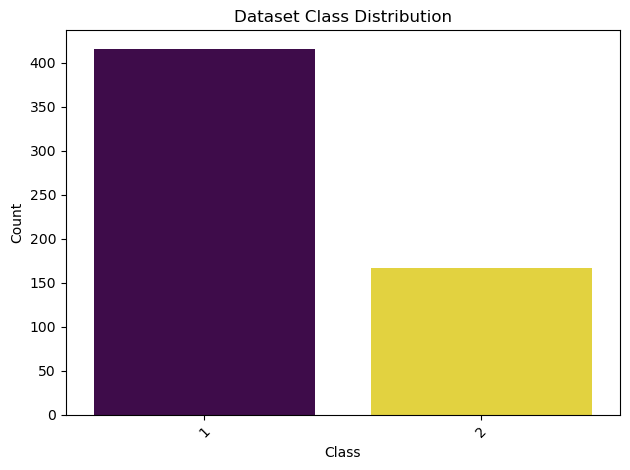

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Dataset', hue='Dataset', palette='viridis',legend=False)
plt.title('Dataset Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [254]:
#Handling missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
num_min                       0
num_max                       0
dtype: int64

In [215]:
missing_mask = df['Albumin_and_Globulin_Ratio'].isnull()
print(missing_mask)

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: bool


In [255]:
# Fill null values with the mean
mean_value = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'] =df['Albumin_and_Globulin_Ratio'].fillna(mean_value)

In [257]:
# Define the feature and target variables
X = df.drop(columns=['Dataset'], errors='ignore')   
y= df['Dataset']
liv_feature = X.columns.tolist()

In [258]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X['Gender']) 

X['Gender'] = label_encoder.transform(X['Gender'])

In [269]:
# Save the label encoder to a pickle file
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)



In [ ]:
import pickle

X = X.drop(columns=['num_min', 'num_max'], errors='ignore')
liv_feature = X.columns.tolist()
print("Features used for liver disease prediction:", liv_feature)

with open('liver_feature.pkl', 'wb') as f:
    pickle.dump(liv_feature, f)

Features used for liver disease prediction: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


In [271]:
print("Saved feature names:", liv_feature)
print("Loaded feature names:", pickle.load(open('liver_feature.pkl', 'rb')))
print("Features in input dataframe:", X.columns.tolist())

Saved feature names: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Loaded feature names: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Features in input dataframe: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


In [272]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
num_min                       0
num_max                       0
dtype: int64

In [273]:
# Resampling using SMOTE-Tomek 
from imblearn.combine import SMOTETomek
from collections import Counter

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))


Original distribution: Counter({1: 416, 2: 167})
Resampled distribution: Counter({1: 384, 2: 384})


In [274]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [275]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [276]:
import pickle

# Save the scaler to a pickle file
with open('lscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [277]:
# Model training using Random Forest Classifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

rf_ilmodel = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_ilmodel.fit(X_train_scaled, y_train)

# Calibrate the model
calibrated_rf = CalibratedClassifierCV(rf_ilmodel, cv=3)
calibrated_rf.fit(X_train_scaled, y_train) 



CalibratedClassifierCV(cv=3,
                       estimator=RandomForestClassifier(class_weight='balanced',
                                                        random_state=42))

In [278]:
import pickle

with open('rf_ilmodel.pkl', 'wb') as f:
    pickle.dump(calibrated_rf, f)


In [279]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = calibrated_rf.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[93 24]
 [16 98]]

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.79      0.82       117
           2       0.80      0.86      0.83       114

    accuracy                           0.83       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.83      0.83      0.83       231

Accuracy: 0.8268398268398268
